In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore")

In [142]:
data=pd.read_csv(r"D:\ExcelR Data Science\Datasets\TigerAnalytics\train_indessa.csv")

In [143]:
#data.head()

In [144]:
data.shape

(532428, 45)

In [101]:
#data.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [103]:
data.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [145]:
data=data.drop(['member_id','batch_enrolled','emp_title','emp_length','desc','title','zip_code'],axis=1)

In [105]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,36 months,19.19,E,E3,OWN,28700.0,Source Verified,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,36 months,10.99,B,B4,MORTGAGE,65000.0,Source Verified,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,36 months,7.26,A,A4,OWN,45000.0,Not Verified,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,36 months,19.72,D,D5,RENT,105000.0,Not Verified,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,36 months,10.64,B,B2,RENT,52000.0,Verified,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


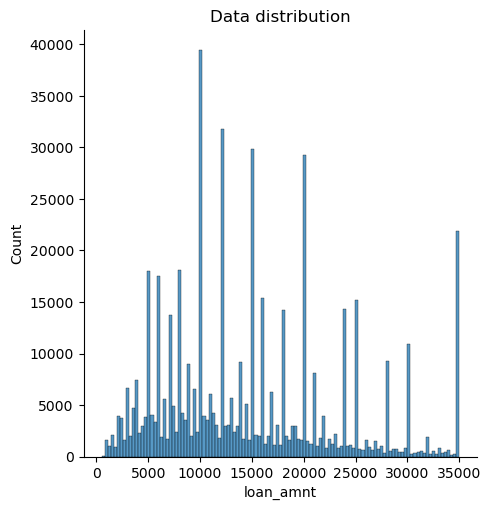

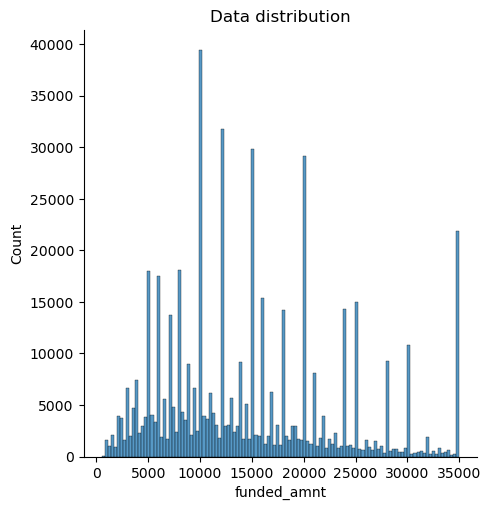

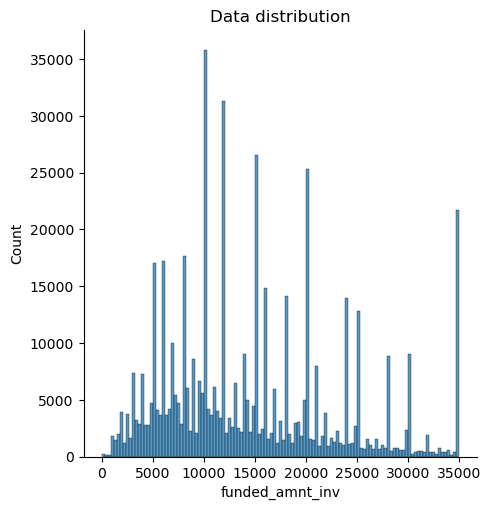

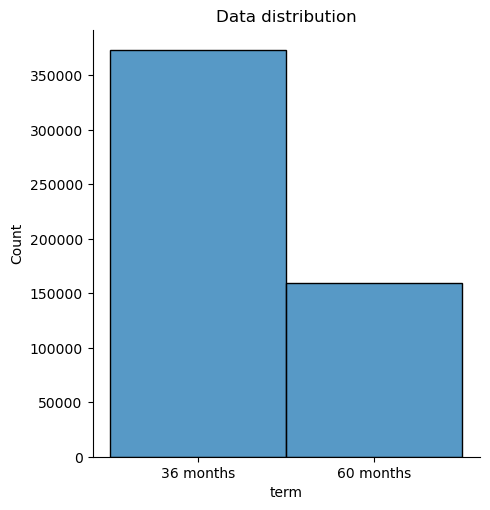

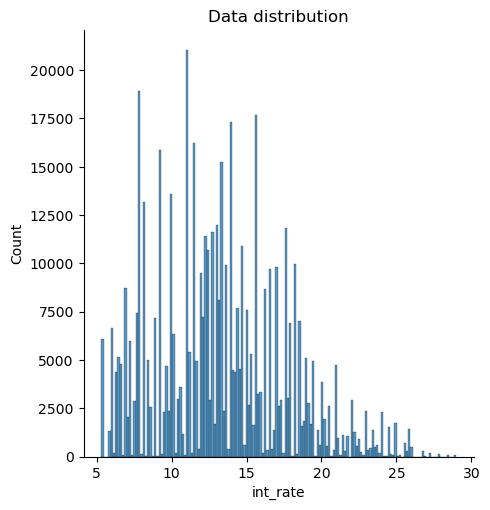

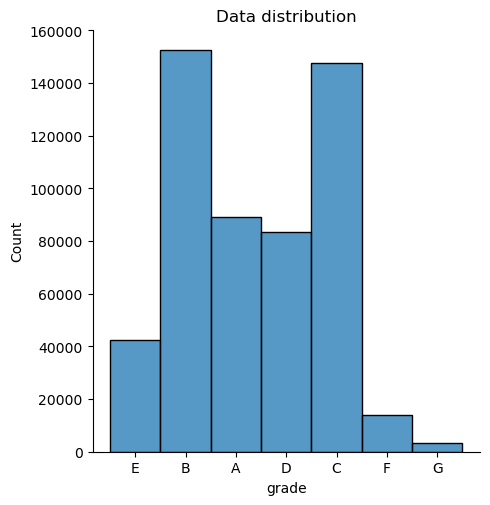

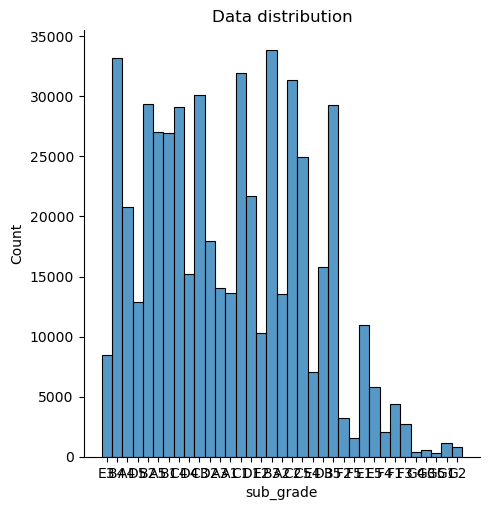

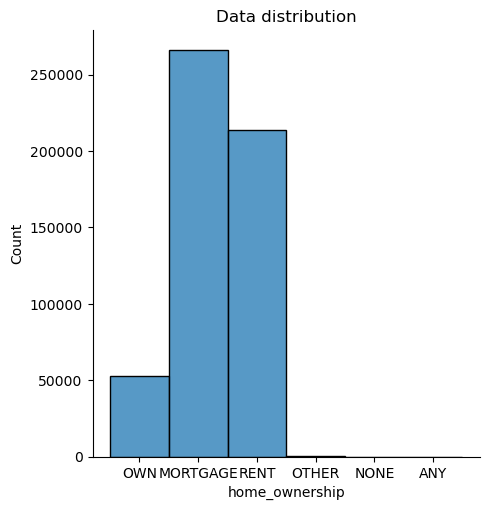

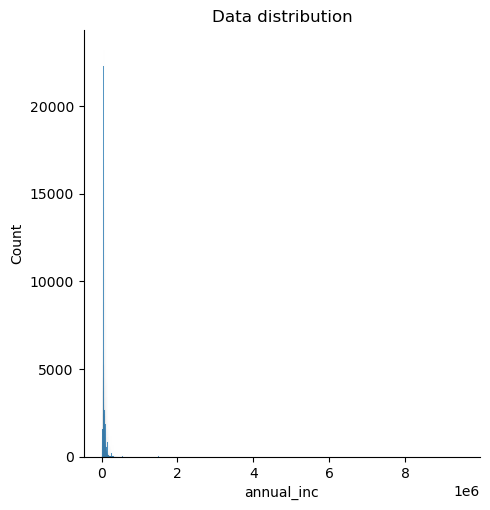

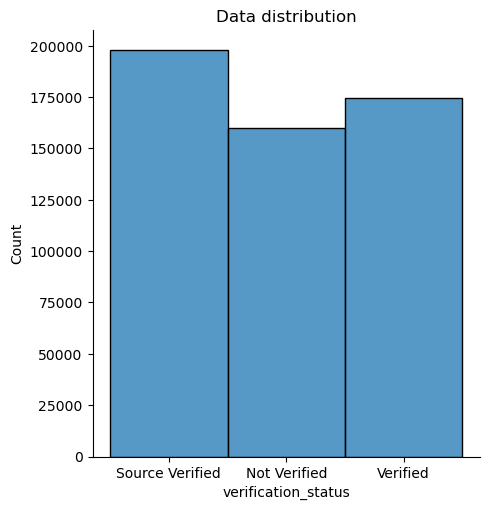

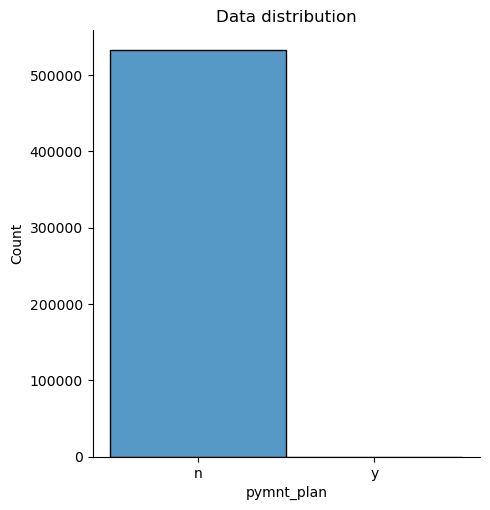

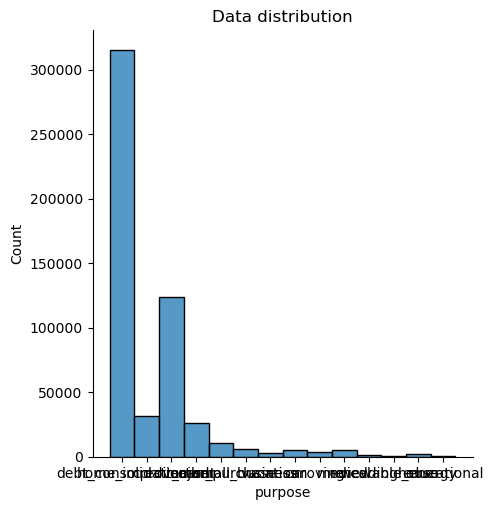

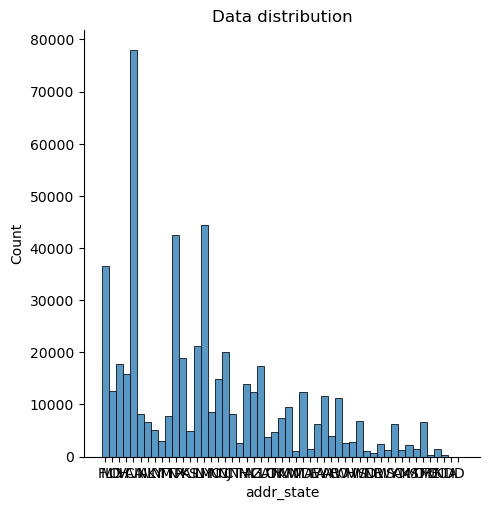

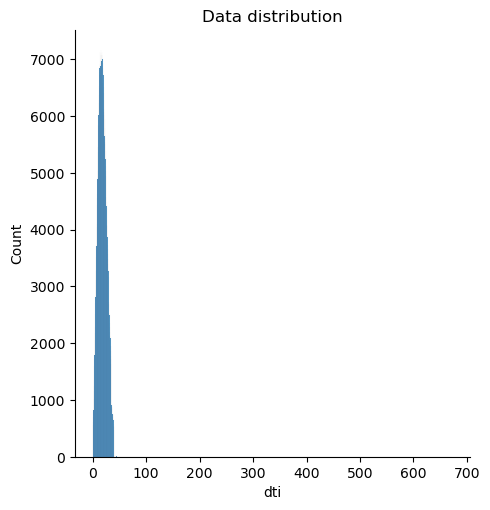

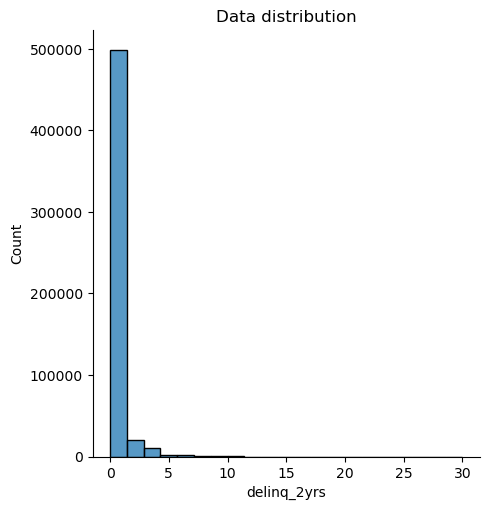

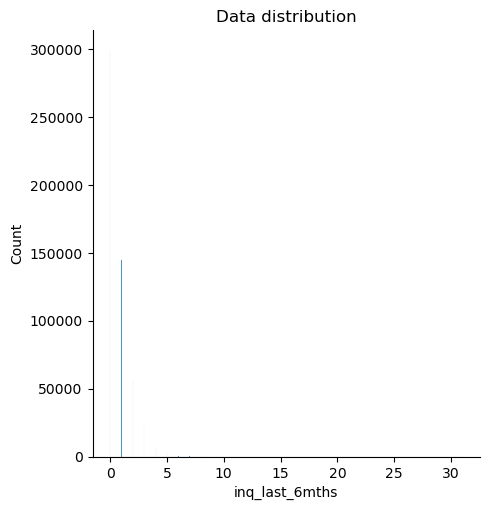

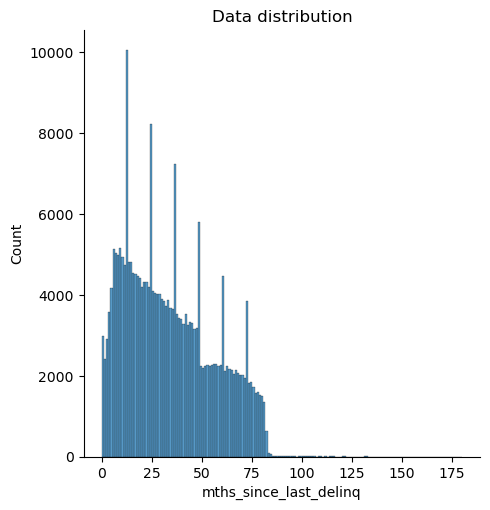

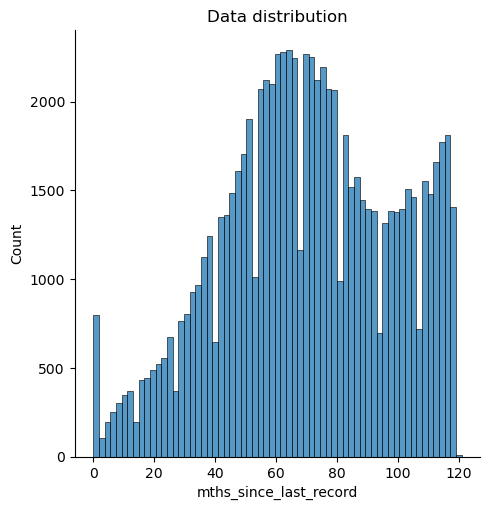

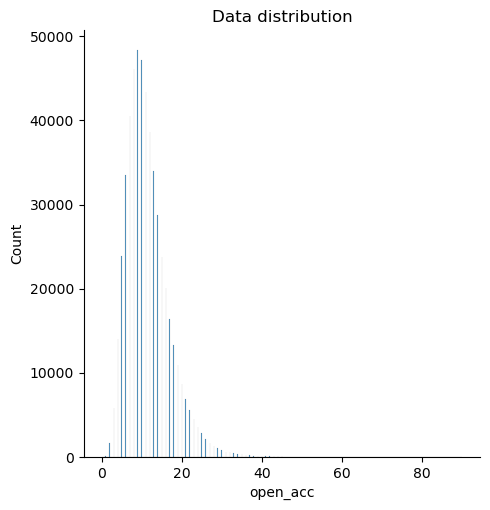

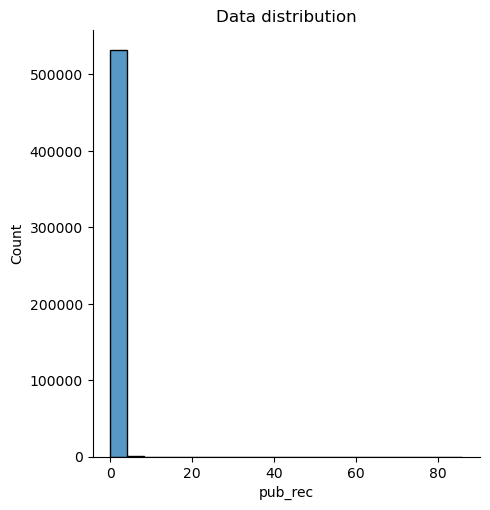

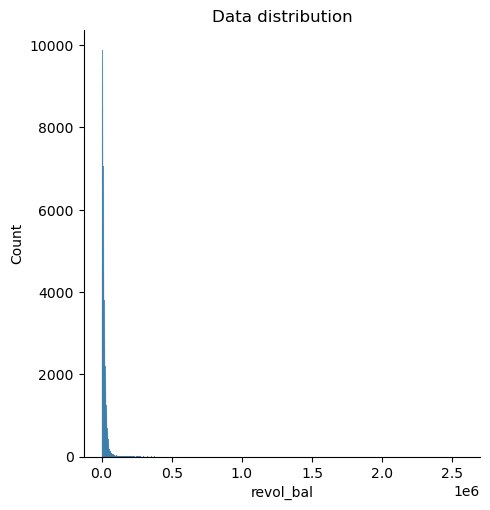

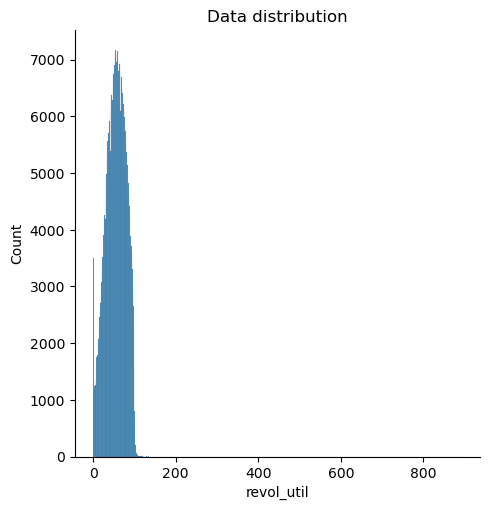

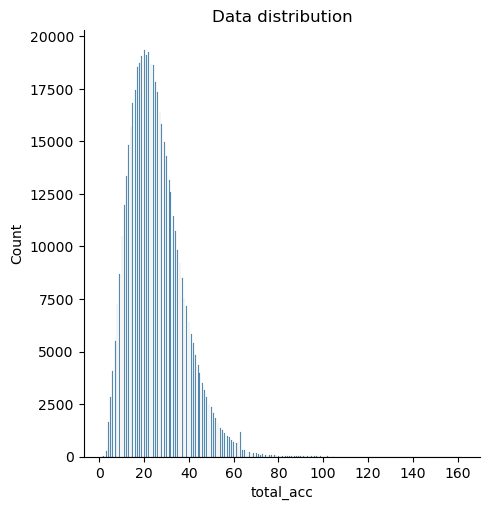

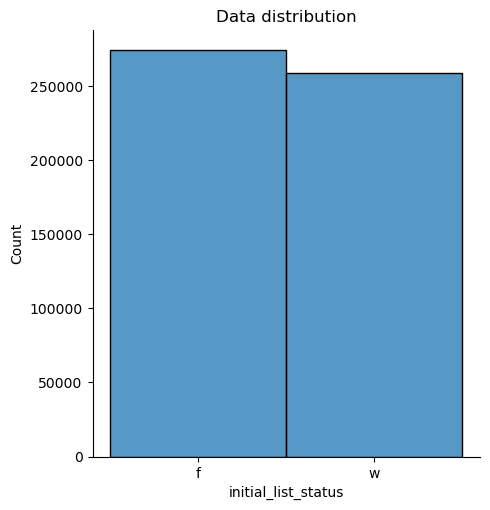

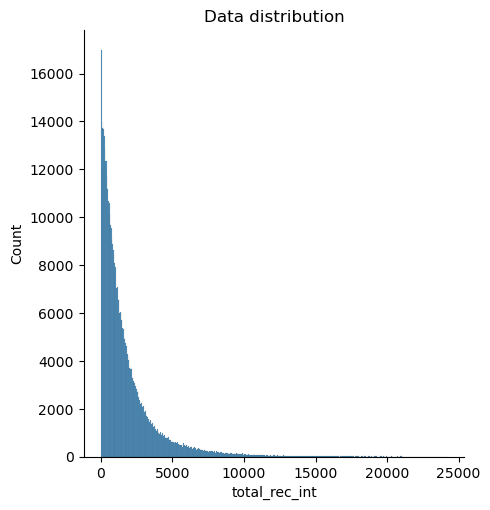

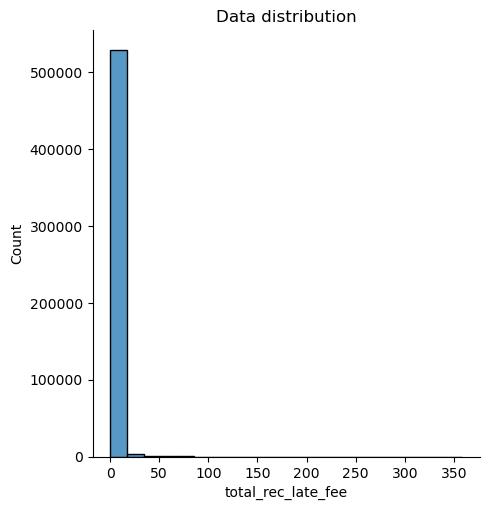

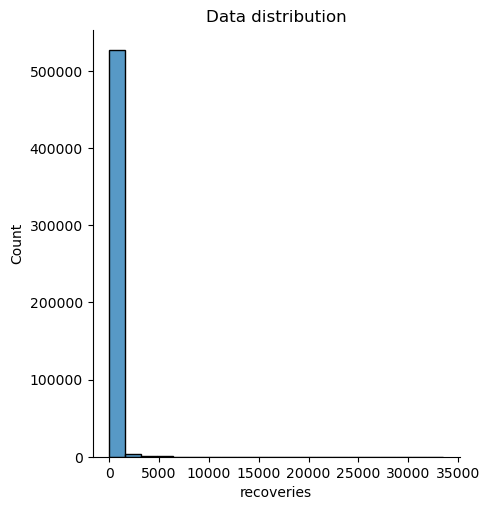

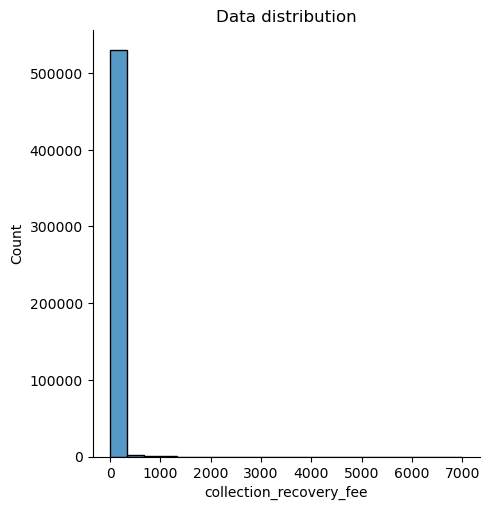

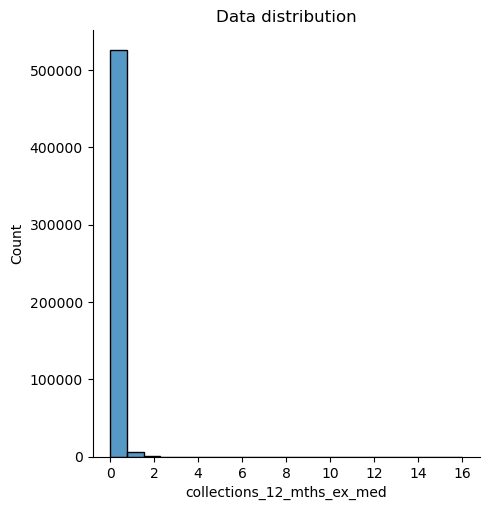

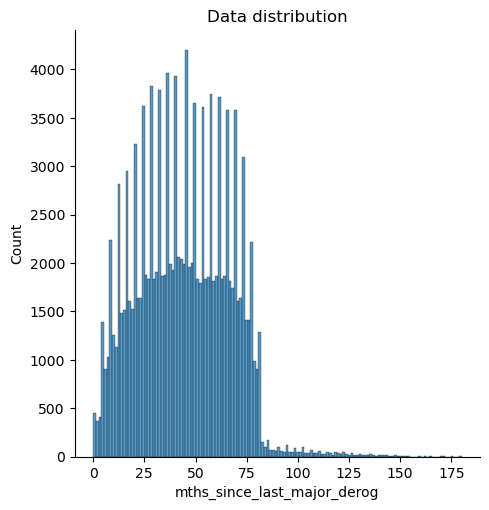

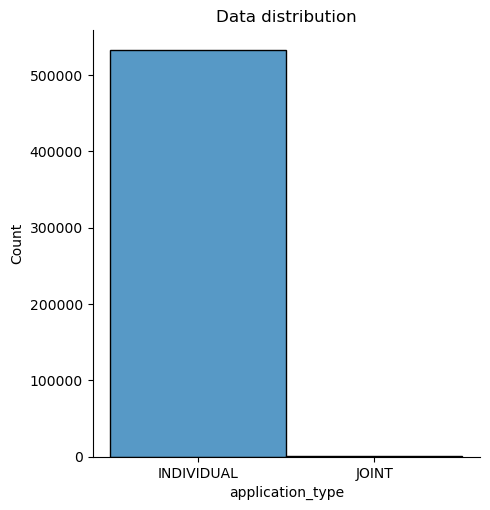

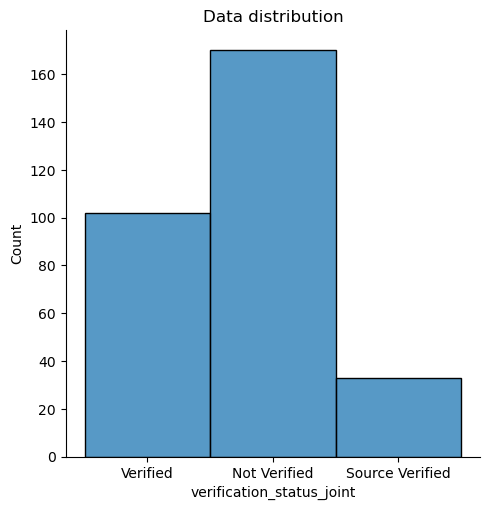

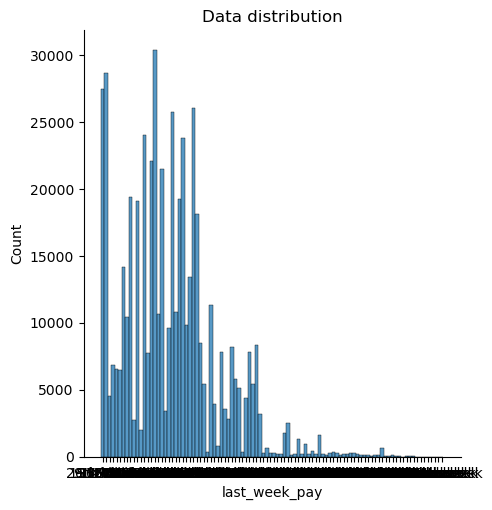

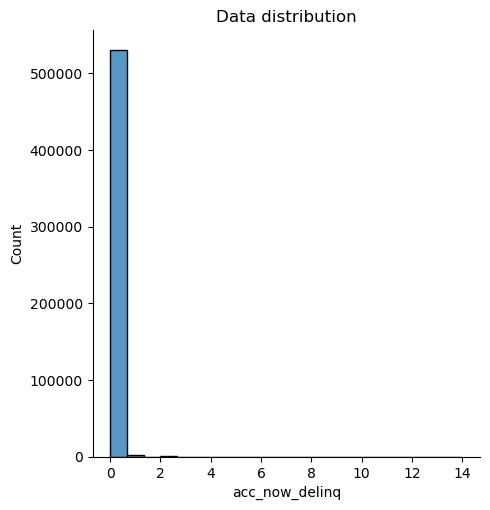

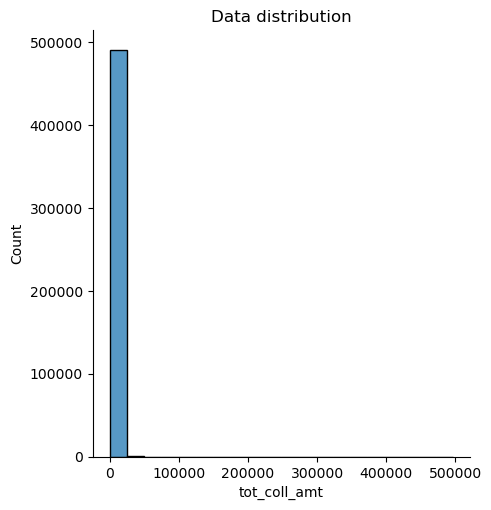

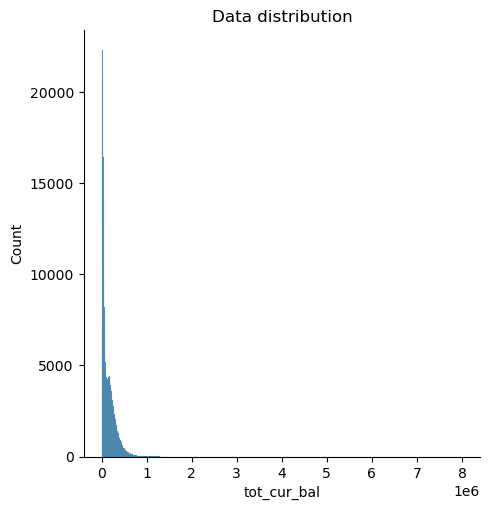

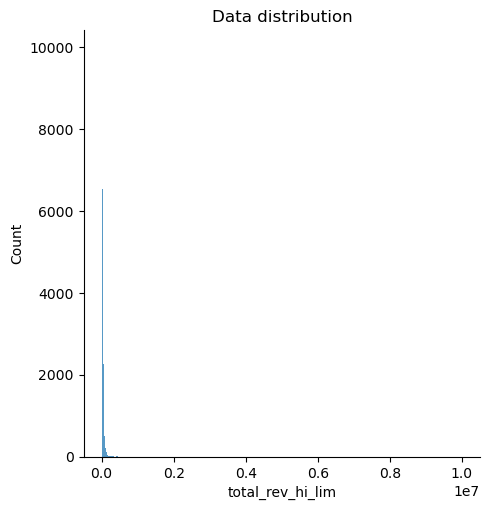

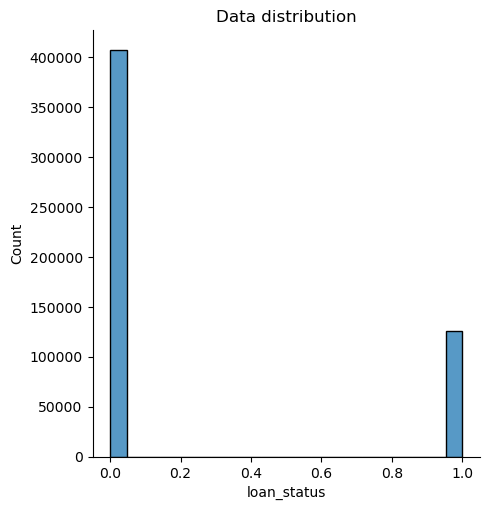

In [106]:
#data Distribution
import seaborn as sns
for col in data.columns:
    sns.displot(data[col])
    plt.xlabel(col)
    plt.title('Data distribution')
    plt.show()

In [146]:
for col in data.select_dtypes(exclude='object'):
    data[col]=data[col].fillna(data[col].median())
    

In [108]:
data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
grade                               0
sub_grade                           0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

In [109]:
data['verification_status_joint'].unique()

array([nan, 'Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [110]:
data['verification_status_joint'].mode()

0    Not Verified
Name: verification_status_joint, dtype: object

In [147]:
data['verification_status_joint']=data['verification_status_joint'].fillna('Not Verified')

In [112]:
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
applicatio

In [113]:
data['verification_status_joint'].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

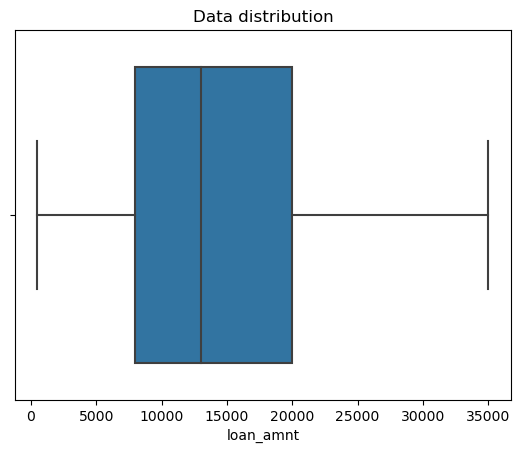

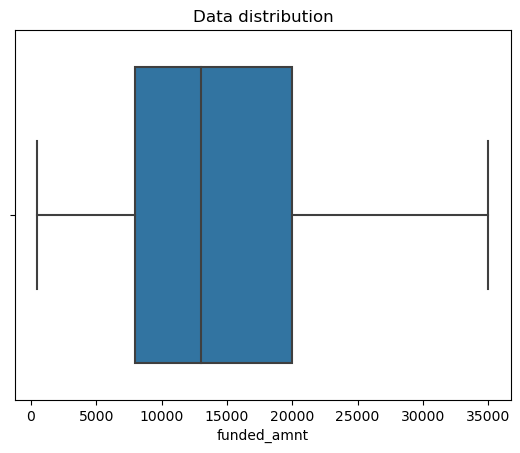

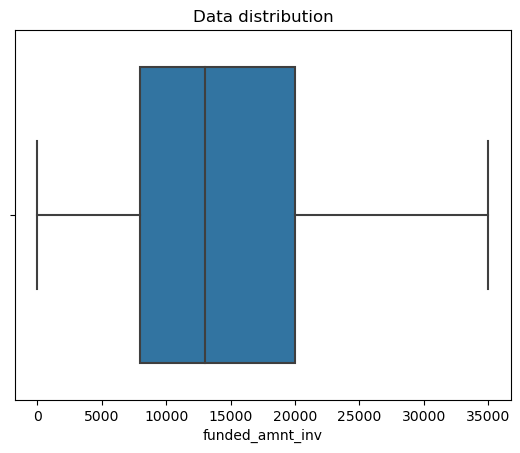

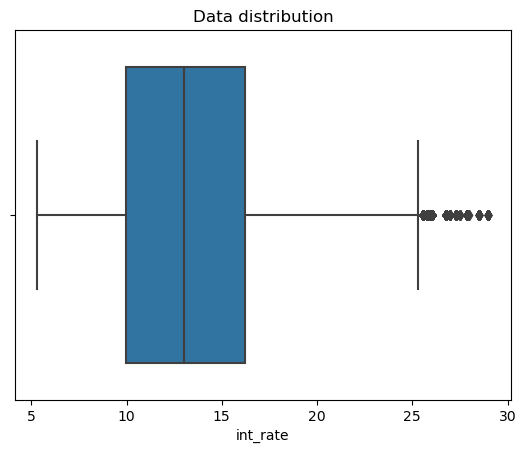

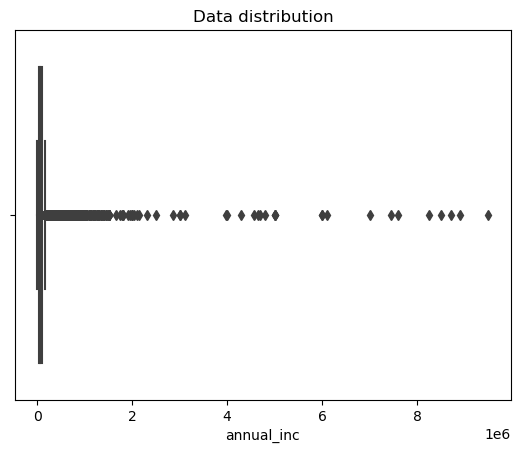

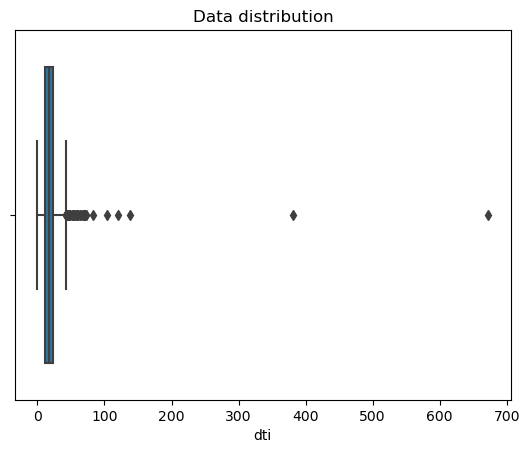

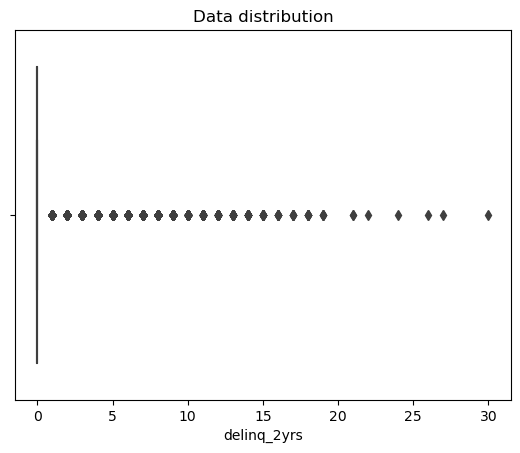

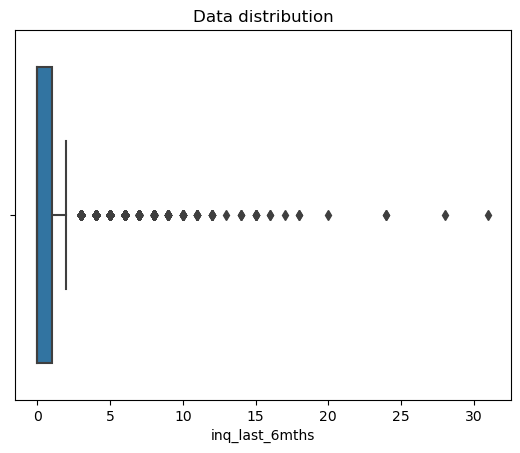

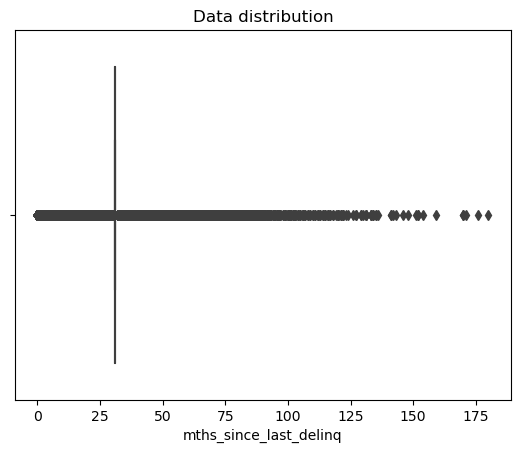

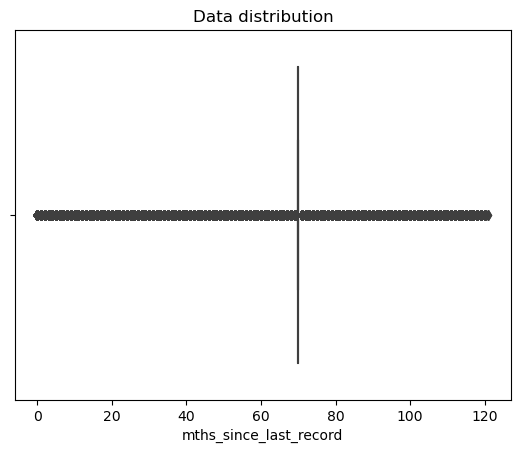

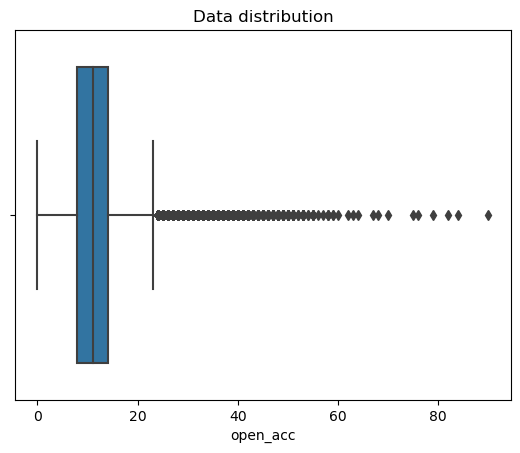

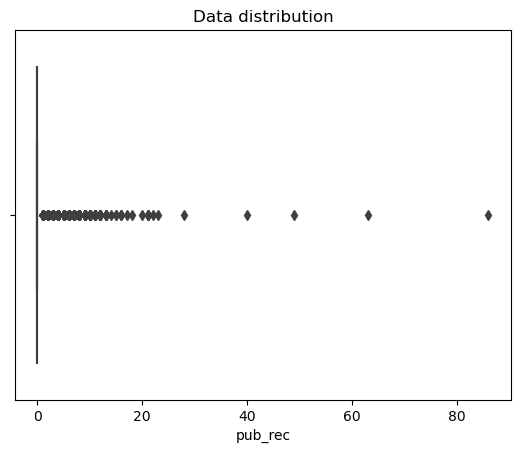

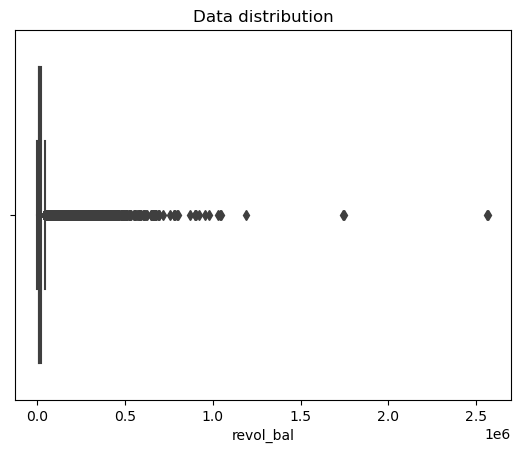

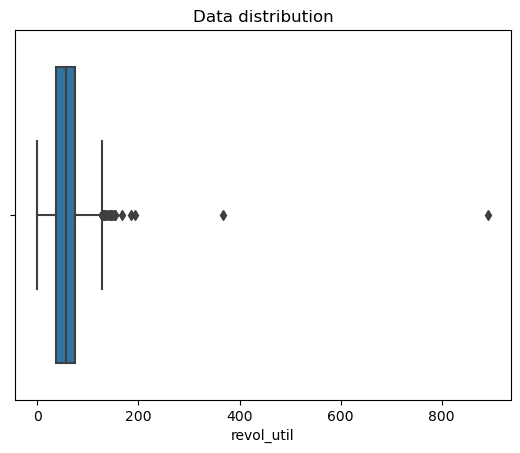

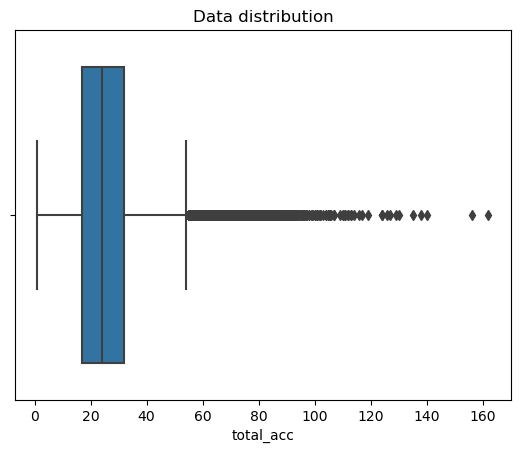

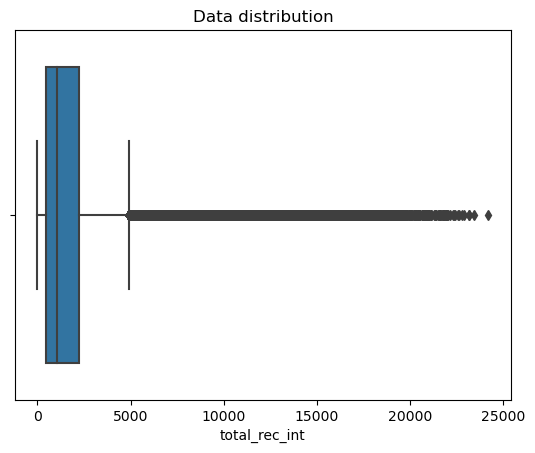

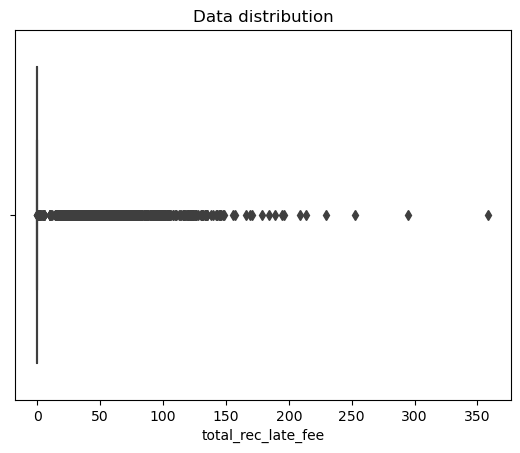

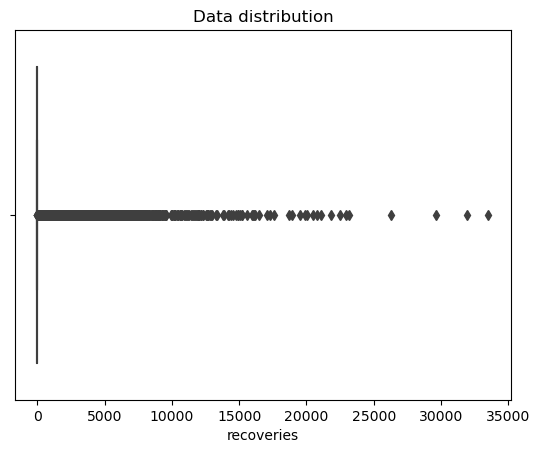

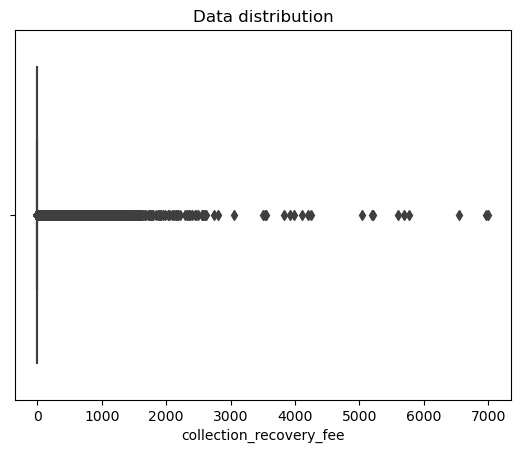

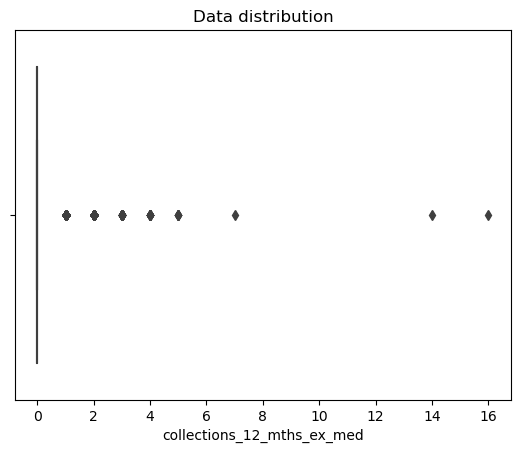

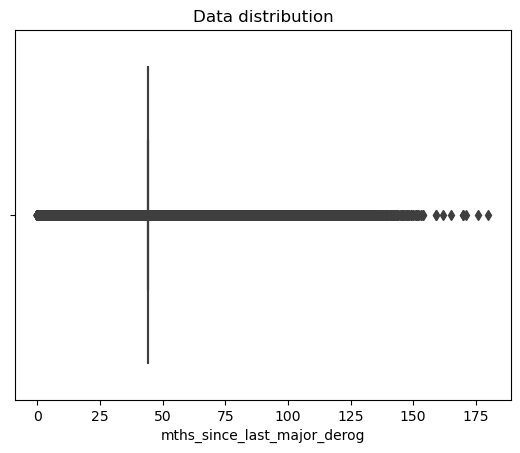

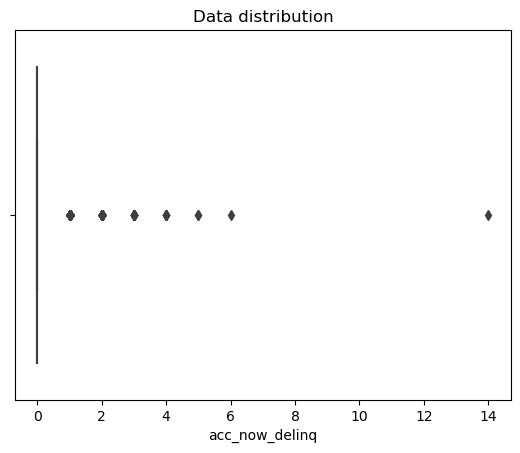

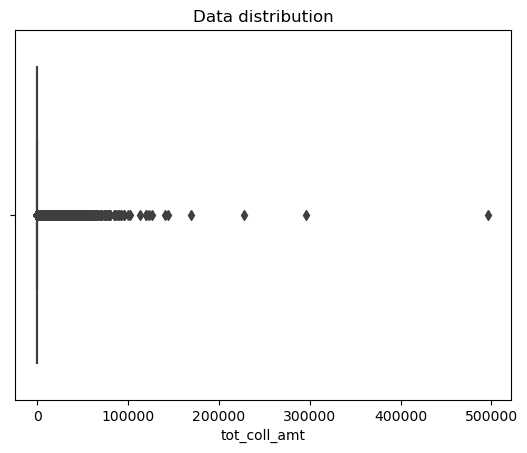

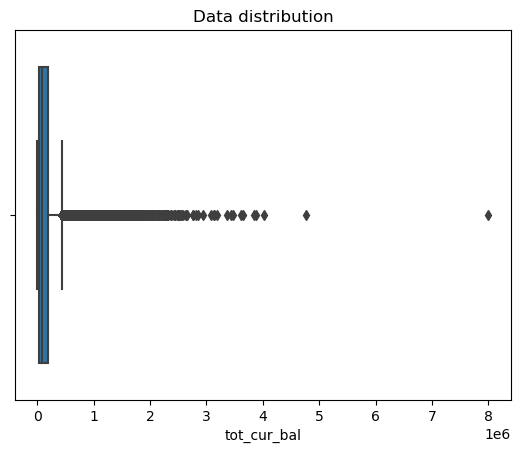

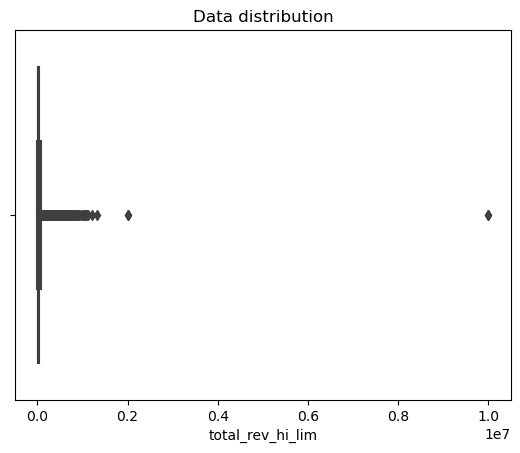

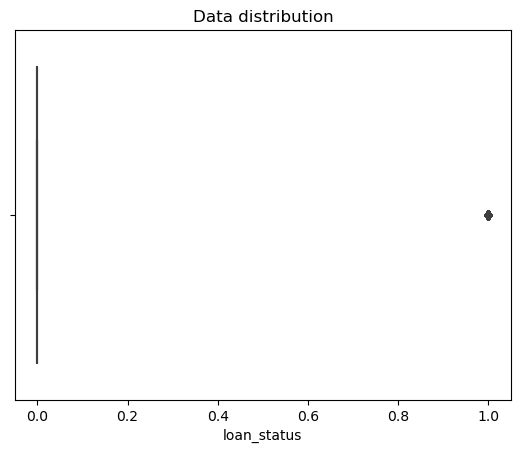

In [114]:
# outliers
for col in data.select_dtypes(exclude='object'):
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.title('Data distribution')
    plt.show()

In [148]:
from collections import Counter
def outlier_hunt(df):
    df=df.select_dtypes(exclude='object')
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 ) 
    return  multiple_outliers  
    

print('The dataset contains %d observations more than 2 outlier' %(len(outlier_hunt(data))))  

The dataset contains 193352 observations more than 2 outlier


In [149]:
outlier_index=outlier_hunt(data)
#data=data.select_dtypes(exclude='object')
for col in data.select_dtypes(exclude='object').columns.tolist():
    median_val=data[col].median()
    data.loc[data.index.isin(outlier_index),col]=median_val

In [117]:
#data.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
grade                           object
sub_grade                       object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
total_rec_int                  float64
total_rec_late_fee       

In [150]:
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(object).columns:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])



In [121]:
#data.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
grade                            int32
sub_grade                        int32
home_ownership                   int32
annual_inc                     float64
verification_status              int32
pymnt_plan                       int32
purpose                          int32
addr_state                       int32
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status              int32
total_rec_int                  float64
total_rec_late_fee       

In [151]:
x=data.drop('loan_status',axis=1)


In [152]:
y=data['loan_status']

In [153]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("ClassificationReport:\n",classification_report(lr_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(lr_pred,y_test))
print("Accuracy:","{:.2f}%".format(accuracy_score(lr_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93    154956
           1       0.14      0.59      0.22      4773

    accuracy                           0.88    159729
   macro avg       0.56      0.74      0.58    159729
weighted avg       0.96      0.88      0.91    159729

ConfusionMatrix:
 [[137161  17795]
 [  1972   2801]]
Accuracy: 0.88%


In [156]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
ds_pred=ds.predict(x_test)

print('Classification Report:\n',classification_report(y_test,ds_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ds_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(ds_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94    139133
           1       0.62      0.64      0.63     20596

    accuracy                           0.90    159729
   macro avg       0.78      0.79      0.79    159729
weighted avg       0.90      0.90      0.90    159729

Confusion Matrix:
 [[130895   8238]
 [  7431  13165]]
Accuracy: 0.90%


In [158]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print('Classification Report:\n',classification_report(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(rf_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    139133
           1       0.93      0.46      0.62     20596

    accuracy                           0.93    159729
   macro avg       0.93      0.73      0.79    159729
weighted avg       0.93      0.93      0.92    159729

Confusion Matrix:
 [[138446    687]
 [ 11062   9534]]
Accuracy: 0.93%


In [159]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)

print('Classification Report:\n',classification_report(y_test,gnb_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,gnb_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(gnb_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.24    139133
           1       0.15      1.00      0.25     20596

    accuracy                           0.25    159729
   macro avg       0.57      0.57      0.25    159729
weighted avg       0.89      0.25      0.24    159729

Confusion Matrix:
 [[ 19273 119860]
 [    87  20509]]
Accuracy: 0.25%


In [160]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg_pred=xg.predict(x_test)

print('Classification Report:\n',classification_report(y_test,xg_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,xg_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(xg_pred,y_test)))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    139133
           1       0.91      0.70      0.79     20596

    accuracy                           0.95    159729
   macro avg       0.93      0.85      0.88    159729
weighted avg       0.95      0.95      0.95    159729

Confusion Matrix:
 [[137697   1436]
 [  6122  14474]]
Accuracy: 0.95%


In [161]:
model=['Logistic','NaiveBayes','DecisionTree','RandomForest','XGBOOST']
accuracy=[accuracy_score(y_test,lr_pred),accuracy_score(y_test,gnb_pred),accuracy_score(y_test,ds_pred),
          accuracy_score(y_test,rf_pred),accuracy_score(xg_pred,y_test)]
acc=pd.DataFrame({'MLModel':model,
                 'Accuracy':accuracy})

In [163]:
acc.sort_values('Accuracy',ascending=False)

,MLModel,Accuracy
4,XGBOOST,0.952682
3,RandomForest,0.926444
2,DecisionTree,0.901903
0,Logistic,0.876247
1,NaiveBayes,0.249059


In [175]:
Confusion_matrix=confusion_matrix(y_test,xg_pred)
Confusion_matrix

array([[137697,   1436],
       [  6122,  14474]], dtype=int64)

In [169]:
tp=Confusion_matrix[0,0]
fp=Confusion_matrix[0,1]
tn=Confusion_matrix[1,0]
fn=Confusion_matrix[1,1]

print(tp,fp,tn,fn)

137697 1436 6122 14474


In [170]:
tpr=tp/(tp+fn)
fpr=fp/(fp+tn)

print(tpr,fpr)

0.904883322052165 0.18999735379730087


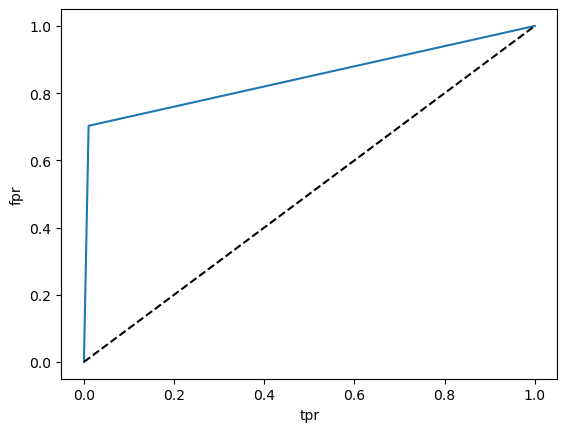

In [177]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,xg_pred)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()